In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
y = np.random.randint(0, 4, 10)#.reshape(10, 1)
y

array([0, 0, 2, 2, 3, 0, 3, 2, 3, 1])

In [3]:
X = np.random.randint(0, 30, 50).reshape(10, 5)
X

array([[ 9,  6,  4, 21,  3],
       [15, 14, 15, 28,  1],
       [26,  2, 11,  4, 17],
       [26, 14,  7, 28, 22],
       [11, 16,  5, 10, 27],
       [25, 24,  3, 14, 27],
       [16, 24,  9,  7, 10],
       [16, 26, 19, 18,  5],
       [10, 13, 28, 23, 12],
       [29,  7,  5, 26,  2]])

In [28]:
def one_hot(y, k):
    y_hot = np.zeros((len(y), k))
    # print(y_hot)
    y_hot[np.arange(len(y)), y] = 1
    return y_hot

def softmax(z):
    y_hat = np.array(np.exp(z - np.max(z)))
    for i in range(len(z)):
        y_hat[i] /= np.sum(y_hat[i])
    return y_hat

def logistic_fit(X, y, lr, k, epochs):
    n, m = X.shape
    w = np.random.random((m, k))
    losses = []
    for epoch in range(epochs):
        z  = X @ w
        y_hat = softmax(z)
        y_hot = one_hot(y, k)
        w_grad = (1/n)*np.dot(X.T, (y_hat - y_hot))
        w = w - lr*w_grad
        loss = - np.mean(np.log(y_hat[np.arange(len(y)), y]))
        print(loss)
        losses.append(loss)
    return w, losses
        
def predict(X, w):
    z = X @ w
    print(z)
    y_hat = softmax(z)
    print(y_hat)
    return np.argmax(y_hat, axis = 1)

def accuracy(y, y_hat):
    return np.sum(y == y_hat)/len(y)

In [5]:
hot = one_hot(y, 4)
hot

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [13]:
w = np.random.random(40).reshape(10, 4)
w

array([[0.70781827, 0.58135887, 0.49633192, 0.99216424],
       [0.19169131, 0.45507739, 0.27696155, 0.41809357],
       [0.30306444, 0.95490351, 0.2059597 , 0.44826661],
       [0.23508036, 0.01559357, 0.87525341, 0.27167515],
       [0.15267109, 0.42828903, 0.43744309, 0.36509173],
       [0.30534616, 0.60289114, 0.87454258, 0.41551425],
       [0.16220105, 0.70947109, 0.78440148, 0.40802449],
       [0.8174975 , 0.07373479, 0.03926984, 0.55311643],
       [0.04214161, 0.35819401, 0.50888022, 0.91387604],
       [0.76412868, 0.44540852, 0.40532517, 0.96482753]])

In [14]:
z = w.T @ X
z

array([[ 70.8068598 ,  51.64338921,  34.3581786 ,  70.51457062,
         32.74893016],
       [ 86.10485368,  60.02815788,  43.75748406,  68.04291095,
         59.26996668],
       [ 93.43036308,  76.80840217,  43.42393689,  88.56722188,
         74.90403726],
       [100.82024626,  75.12788672,  64.73882014, 110.32708845,
         57.81032795]])

In [15]:
t = softmax(z)
t

array([[5.72556468e-01, 2.72413607e-09, 8.47924549e-17, 4.27443529e-01,
        1.69617045e-17],
       [9.99999986e-01, 4.73189283e-12, 4.06229112e-19, 1.43152169e-08,
        2.21695382e-12],
       [9.92332992e-01, 5.99558449e-08, 1.90170206e-22, 7.66693958e-03,
        8.92845584e-09],
       [7.43359011e-05, 5.16593139e-16, 1.58940416e-20, 9.99925664e-01,
        1.55678422e-23]])

In [16]:
t[0].sum()

1.0

In [17]:
t.sum()

4.0

In [22]:
w_hat, los = logistic_fit(X, y, 0.01, 4, 100)

15.359976165413446
10.841459955512482
7.24085647286257
5.8562573330901975
4.044479028716496
3.5403641310718195
2.949676827660027
2.7013538095754726
2.3545603942794964
2.5110178451764247
1.7384166960818388
1.9338813384565594
1.6226886749588723
2.060075334731478
1.1768078247007163
1.2074672833592552
1.5575682578998467
1.5580461449036915
0.8979292255210283
1.0590815838472918
1.2473061231282583
1.2485806929873227
0.9542427528760127
1.0623829280871178
1.1915172515825696
0.9300798098386063
1.0013781036693996
1.0346521567557225
1.0325849629636727
0.8656396912643398
1.0550964732674513
0.863647088581938
0.9800389220155739
0.8694482434654356
1.0126219121545326
0.7934428747178593
0.9748193050409212
0.8062138783335928
0.9777992361838892
0.7656082579414543
0.9592120627932079
0.7589118364855011
0.9547339808370652
0.7365760718899252
0.9410810028089255
0.7267405075138109
0.935564743841583
0.710701702233109
0.9238455551392241
0.7020518515638873
0.9183763739200191
0.6893063541448854
0.9078814844332175
0

In [23]:
w_hat

array([[0.40161623, 0.75733513, 0.60826676, 0.21069792],
       [0.71985203, 0.44878553, 0.45678995, 0.7000735 ],
       [0.06300209, 0.08740601, 0.41377222, 0.55625224],
       [1.06903149, 0.86690716, 0.77628075, 0.67399188],
       [0.34006732, 0.11603823, 0.34043956, 0.61346902]])

In [29]:
y_pred = predict(X, w_hat)
y_pred

[[31.65552998 28.41151842 27.1934439  24.31596773]
 [47.32015242 43.34355316 43.80194469 40.79052301]
 [22.63201949 26.99002908 30.17260552 26.12200841]
 [58.37532801 53.41179433 54.33193191 51.54103156]
 [36.12255413 27.75038863 33.02311025 39.60369654]
 [51.65411945 45.23618132 47.47074305 49.73751842]
 [35.15322096 30.90360118 33.25753786 36.03183415]
 [47.28195573 41.63101992 45.1457305  47.34106914]
 [43.80682942 37.18625474 45.54629121 49.64643887]
 [45.47579889 48.31291019 43.77030543 32.54274226]]
[[9.51298552e-01 3.71073990e-02 1.09763380e-02 6.17711164e-04]
 [9.52506708e-01 1.78588269e-02 2.82442368e-02 1.39022797e-03]
 [5.01298294e-04 3.91521616e-02 9.43911182e-01 1.64353577e-02]
 [9.75036886e-01 6.81374314e-03 1.71000126e-02 1.04935832e-03]
 [2.98132520e-02 6.89325063e-06 1.34381034e-03 9.68836044e-01]
 [8.59117539e-01 1.40209510e-03 1.30989143e-02 1.26381451e-01]
 [2.79951766e-01 3.99481610e-03 4.20531470e-02 6.74000271e-01]
 [4.58188139e-01 1.61017694e-03 5.41119283e-02 4

array([0, 0, 2, 0, 3, 0, 3, 3, 3, 1], dtype=int64)

In [31]:
accuracy(y, y_pred)

0.8

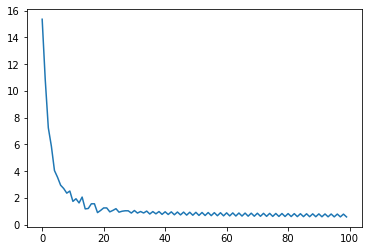

In [32]:
plt.plot(range(100), los)